# Datenauswertung
### Seminar Visuelle Wahrnehmung beim Menschen und Bildqualität
### Modifiziertes Beispiel. Noch nicht bis zum Ende angeglichen

In [5]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [6]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])

NameError: name 'df' is not defined

In [7]:
# we read the data
df = pd.read_csv('result_final.csv')

# if we have more observers we could read their files, assign the column observer 
# with their name, and concatenate the DataFrames with pd.concat(). Example:
#df1 = pd.read_csv('Person1.csv')
#df1['observer'] = 'Person1'      # creates a new column called 'observer'
#df2 = pd.read_csv('Person2.csv') # reads second file
#df2['observer'] = 'Person2'     
#df = pd.concat((df, df2))        # concatenates both dataframes in one


In [8]:
# explore the first entries in your data
df

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
...,...,...,...,...,...,...,...,...,...
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20
2096,2096,portrait_9_7.jpeg,3,2.584903,Philipp,False,portrait_9,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


# Check if string name was correctly split into different .csv columns


In [9]:
errors = 0

for row in range(0,len(df)):

    test_name = df.loc[row]['test_image'] 
    info = test_name.split("_") #split name string into info list
    last = info[-1].split(".")  #remove .jpeg
    info[-1] = last[0]
    
    # info = ['category', 'test_image suffix', 'rotation', 'sigma']
    # 'rotation' if rotated, 'sigma', if compressed

    if 'r' in info:   #handle missing rotation info
        str_rot = True 
    else:
        str_rot = False
    
    csv_cat = df.loc[row]['category']
    csv_img = df.loc[row]['image']
    csv_rot = df.loc[row]['rotation']
    csv_sig = df.loc[row]['sigma']


    if (info[0] != csv_cat) or (info[0]+"_"+info[1] != csv_img) or (str_rot != csv_rot) or (info[-1] != csv_sig and csv_sig != "original"):
        print("found an error in row ", row)
        errors +=1
        
print("I found ", errors, " errors in the .csv file.")

I found  0  errors in the .csv file.


In [10]:
df.groupby(['image', 'test_image']).count()



# we expect 30x10=300 different rows of possible image, g combinations
agg1 = df.groupby(['image', 'test_image']).count()

agg1
    

Unnamed: 0  response  resptime  proband  \
image      test_image                                                      
art_1      art_1.jpeg                     7         7         7        7   
           art_1_12.jpeg                  7         7         7        7   
           art_1_20.jpeg                  7         7         7        7   
           art_1_4.jpeg                   7         7         7        7   
           art_1_7.jpeg                   7         7         7        7   
...                                     ...       ...       ...      ...   
portrait_9 portrait_9_r.jpeg              7         7         7        7   
           portrait_9_r_12.jpeg           7         7         7        7   
           portrait_9_r_20.jpeg           7         7         7        7   
           portrait_9_r_4.jpeg            7         7         7        7   
           portrait_9_r_7.jpeg            7         7         7        7   

                                 rotation  category  sigma  
image      test_image                                       
art_1      art_1.jpeg                   7         7      7  
           art_1_12.jpeg                7         7      7  
           art_1_20.jpeg                7         7      7  
           art_1_4.jpeg                 7         7      7  
           art_1_7.jpeg                 7         7      7  
...                                   ...       ...    ...  
portrait_9 portrait_9_r.jpeg            7         7      7  
           portrait_9_r_12.jpeg         7         7      7  
           portrait_9_r_20.jpeg         7         7      7  
           portrait_9_r_4.jpeg          7         7      7  
           portrait_9_r_7.jpeg          7         7      7  

[300 rows x 7 columns]

## Visualizing data for one image


In [11]:
# selecting data for only one picture
picname = 'portrait_9'

d = df[df['image'] == picname]


In [12]:
d

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
23,23,portrait_9_r_20.jpeg,4,4.689160,Louis,True,portrait_9,portrait,20
63,63,portrait_9_20.jpeg,4,11.031636,Louis,False,portrait_9,portrait,20
71,71,portrait_9_r_7.jpeg,1,3.075401,Louis,True,portrait_9,portrait,7
83,83,portrait_9_r_4.jpeg,1,1.610745,Louis,True,portrait_9,portrait,4
...,...,...,...,...,...,...,...,...,...
1899,1899,portrait_9_r.jpeg,5,0.858795,Philipp,True,portrait_9,portrait,original
1945,1945,portrait_9_r_12.jpeg,5,3.412084,Philipp,True,portrait_9,portrait,12
2069,2069,portrait_9_12.jpeg,4,1.843154,Philipp,False,portrait_9,portrait,12
2077,2077,portrait_9.jpeg,5,0.877916,Philipp,False,portrait_9,portrait,original


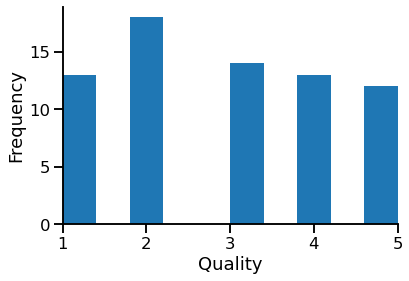

In [13]:
# distribution of quality values for this image category
plt.hist(d['response'])
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim((1, 5))
sns.despine()

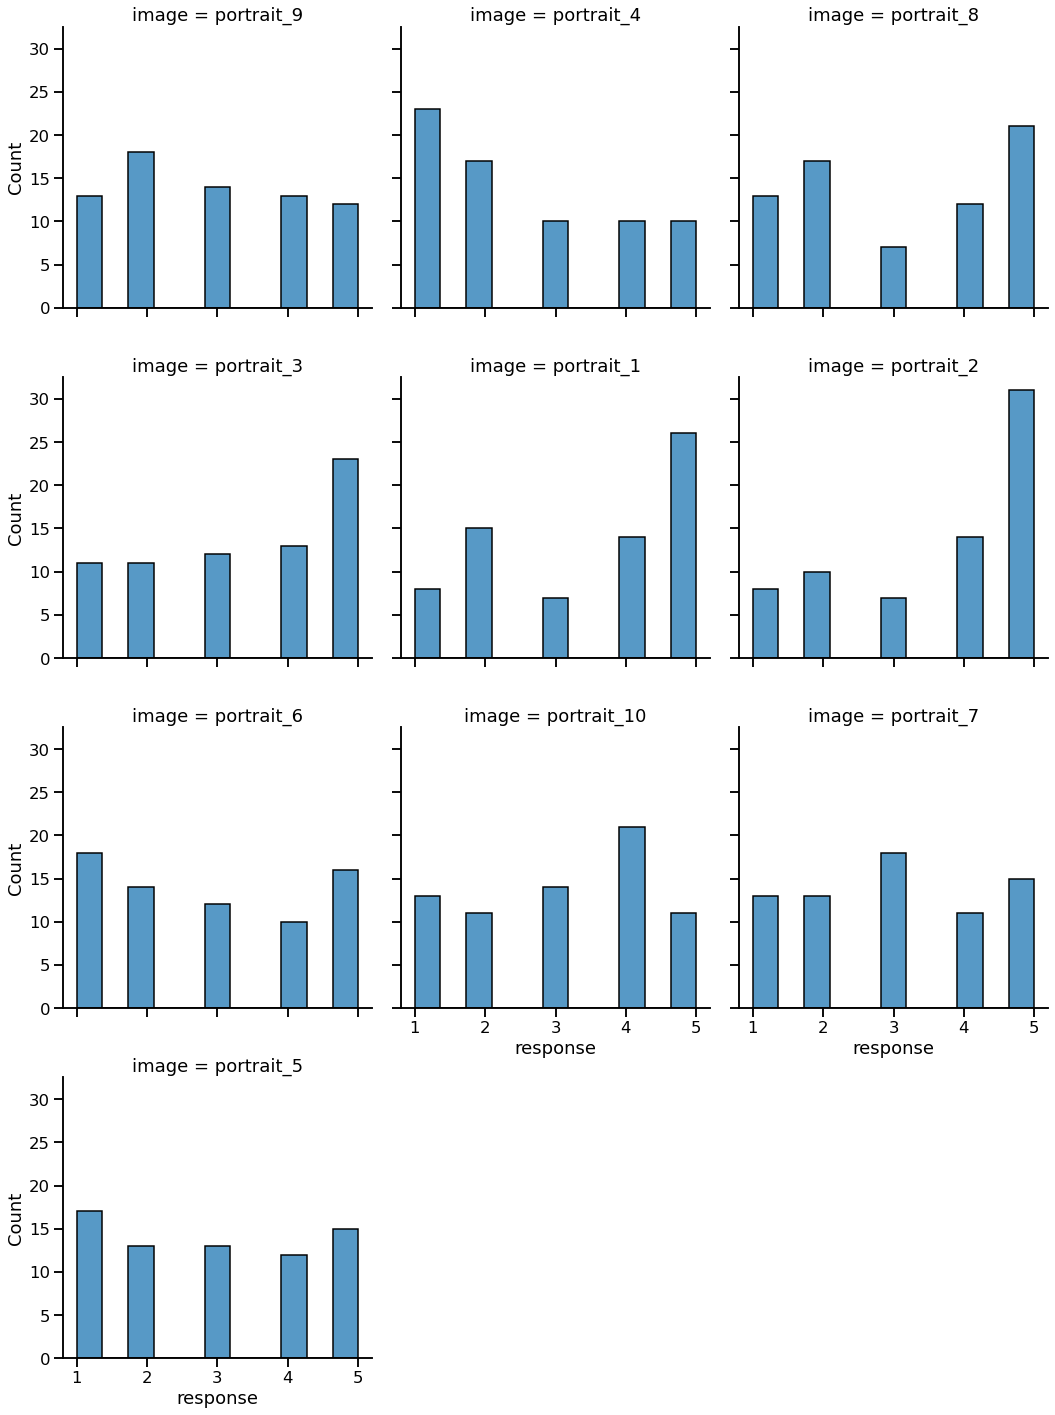

In [14]:
sns.displot(df[df["category"]=="portrait"], x="response", col="image",col_wrap=3)


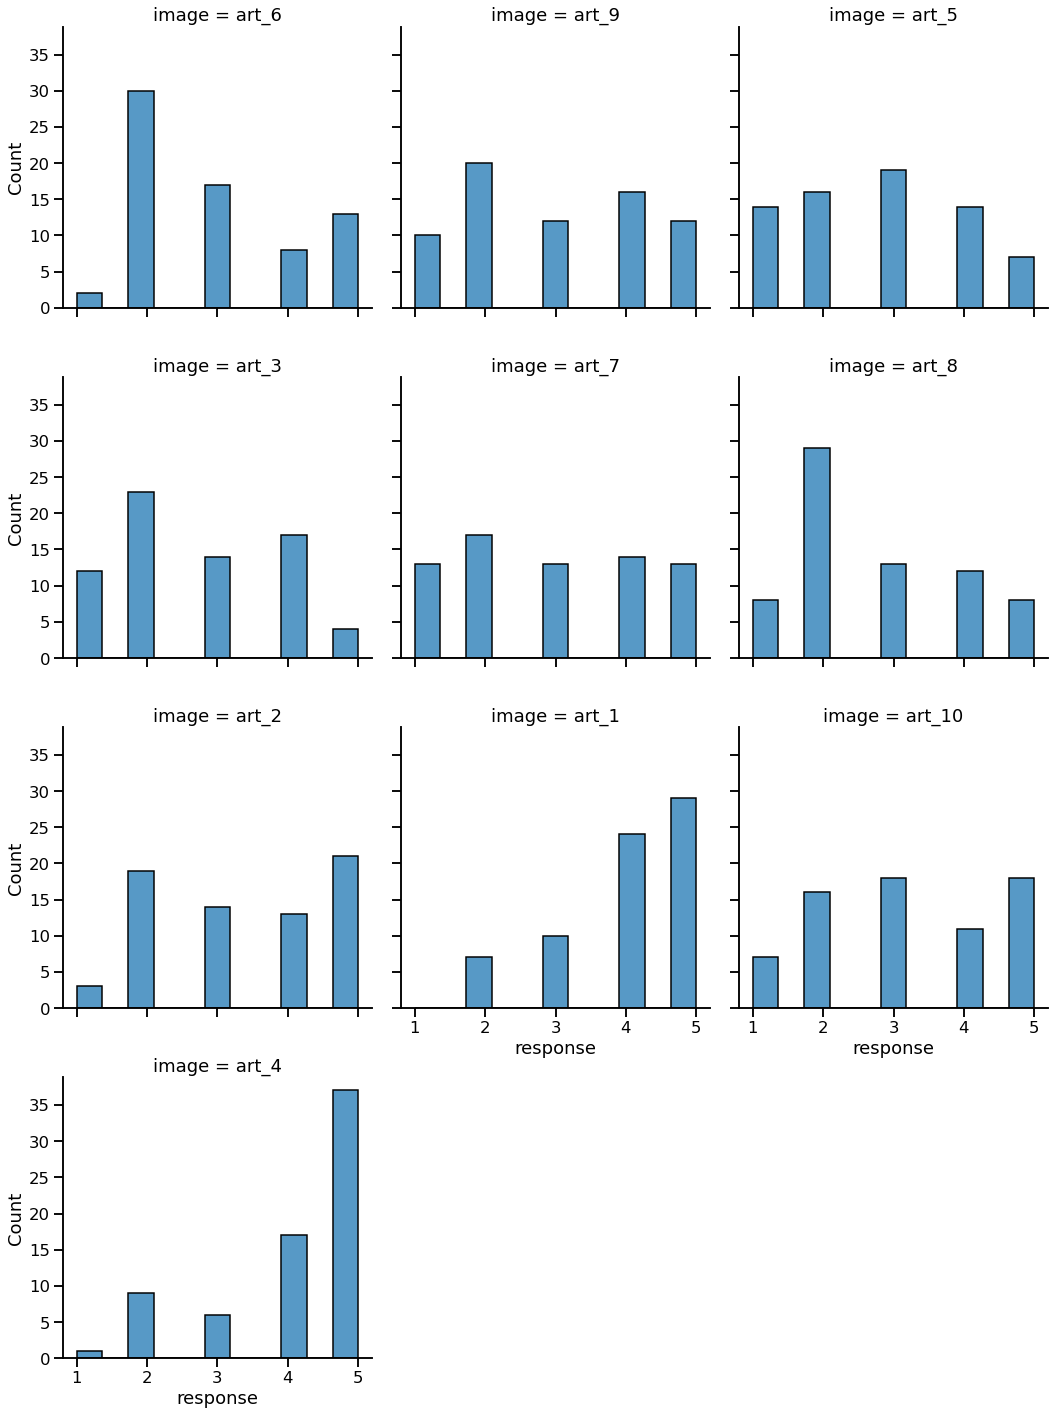

In [15]:
sns.displot(df[df["category"]=="art"], x="response", col="image",col_wrap=3)


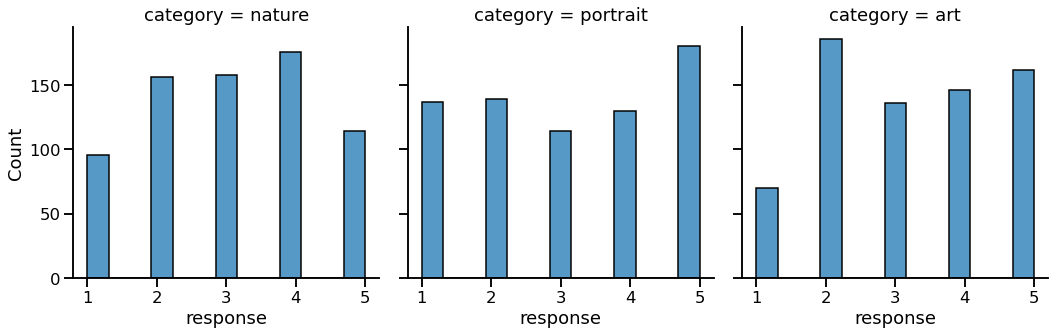

In [16]:
sns.displot(df, x="response", col="category",col_wrap=3)


## Visualizing data from all pictures

## right side up pictures

In [17]:
rsu = df[df['rotation'] == False]

rsu

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
6,6,art_5.jpeg,3,5.888736,Louis,False,art_5,art,original
...,...,...,...,...,...,...,...,...,...
2088,2088,art_6_12.jpeg,5,1.111426,Philipp,False,art_6,art,12
2090,2090,nature_8.jpeg,5,0.937700,Philipp,False,nature_8,nature,original
2094,2094,portrait_1.jpeg,5,0.887019,Philipp,False,portrait_1,portrait,original
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20


## upside down pictures

In [18]:
usd = df[df['rotation'] == True]

usd

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
5,5,nature_9_r.jpeg,4,1.178283,Louis,True,nature_9,nature,original
8,8,portrait_4_r_4.jpeg,1,1.162729,Louis,True,portrait_4,portrait,4
12,12,nature_2_r_20.jpeg,2,5.272169,Louis,True,nature_2,nature,20
13,13,nature_9_r_20.jpeg,2,4.830855,Louis,True,nature_9,nature,20
...,...,...,...,...,...,...,...,...,...
2092,2092,nature_4_r.jpeg,4,1.097267,Philipp,True,nature_4,nature,original
2093,2093,portrait_5_r_7.jpeg,3,1.400931,Philipp,True,portrait_5,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


# Fokussing on orientation

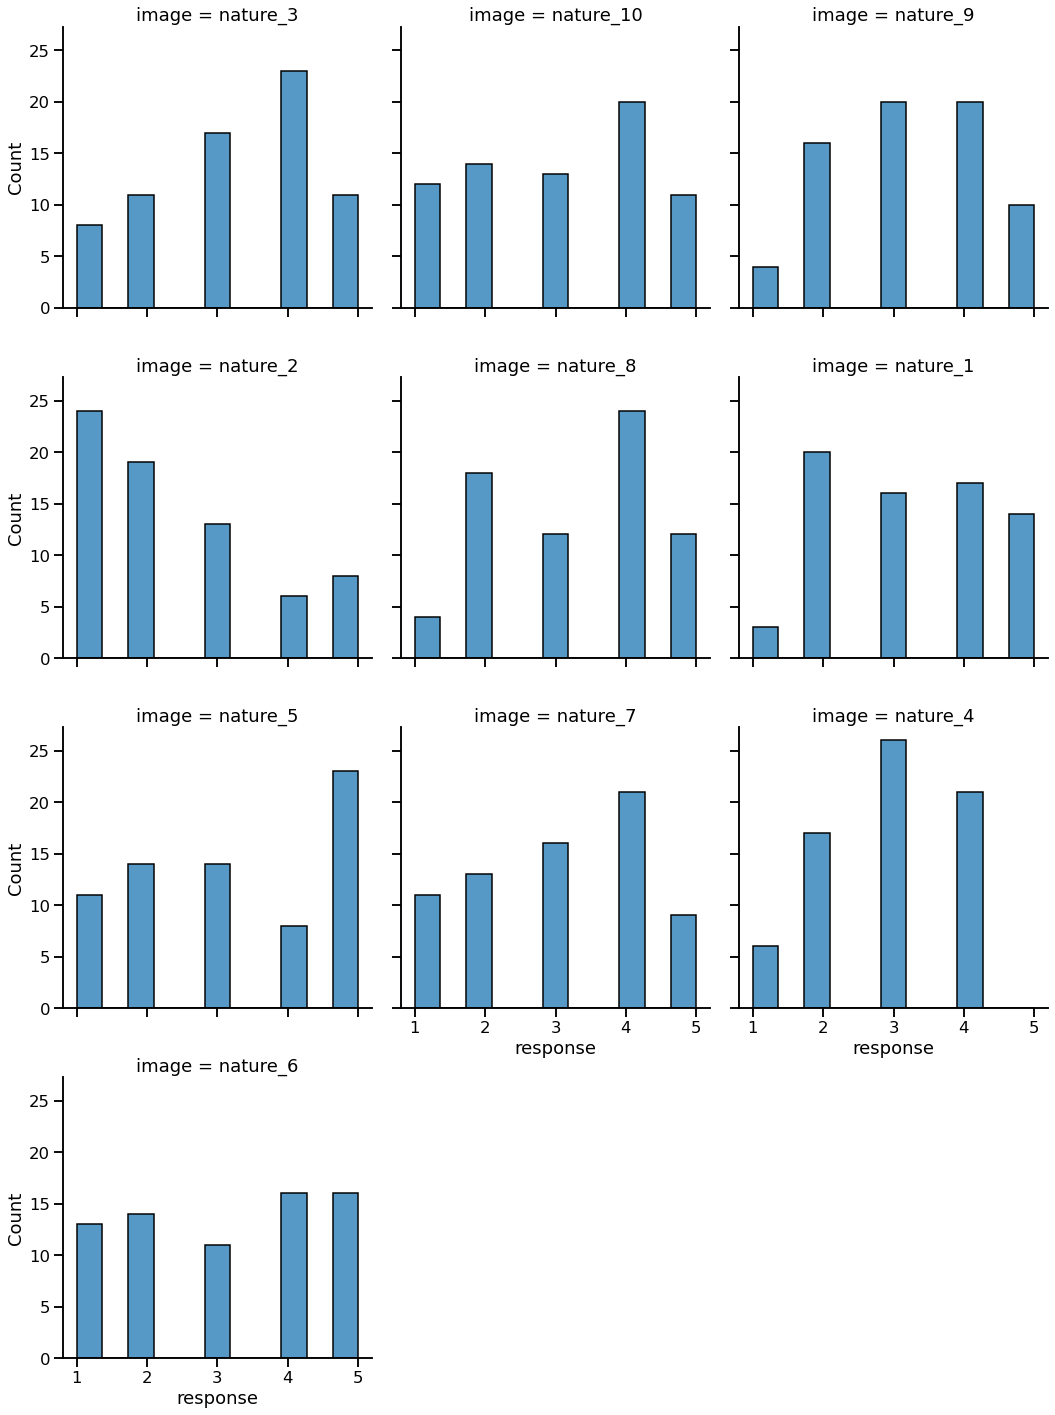

In [19]:
sns.displot(df[df["category"]=="nature"], x="response", col="image",col_wrap=3)



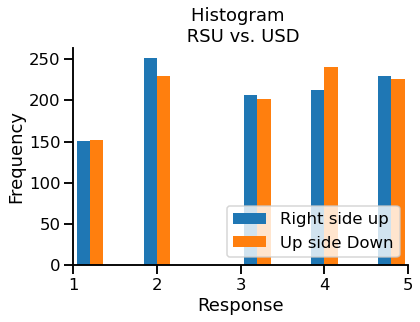

In [20]:
# distribution of quality values for each image orientation
plt.hist([rsu['response'],usd['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xlim((1, 5))
plt.title("Histogram \n RSU vs. USD")
plt.legend(['Right side up', 'Up side Down'], loc = 'lower right')
sns.despine()

Text(0.5, 1.0, 'Avg. Responses\n RSU vs. USD')

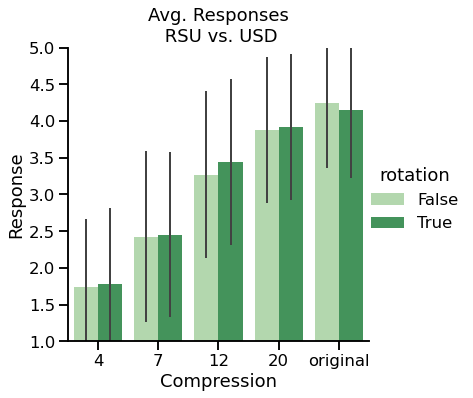

In [21]:
# %% collapsing all pictures into one visualization
g = sns.catplot(x='sigma', y='response', data=df, hue='rotation',
                kind='bar', ci='sd', errwidth=2,
                palette='Greens', order=['4', '7', '12', '20', 'original'])
g.set_ylabels('Response')
g.set_xlabels('Compression')
g.set(ylim = (1, 5))

plt.title('Avg. Responses\n RSU vs. USD')
#g.savefig('allpictures_aggregated.pdf')


# Focusing on Categories

In [22]:
por = df[df['category'] == 'portrait']
nat = df[df['category'] == 'nature']
art = df[df['category'] == 'art']

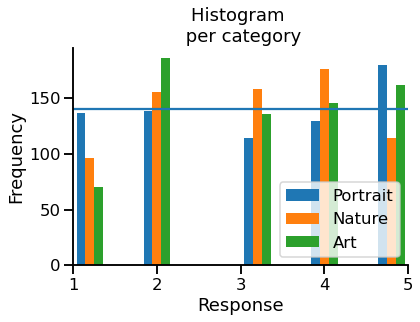

In [23]:
# distribution of quality values for each image orientation
plt.hist([por['response'],nat['response'],art['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title("Histogram \n per category")
plt.legend(['Portrait', 'Nature', 'Art'], loc = 'lower right')
sns.despine()
plt.axhline(140)

#Wir haben 2100  Datenpunkten die unterteilen wir in 3 categorien und diese Categorieren unterteilen
# in 5 Unterkategorien (Response) das heisst das am end wir mussen rein theoretisch falls jede proband
# die Bilder prefekt einstufte jeweils 2100/3/5 = 140 antworten pro bar haben.




1. Man sieht das die bewertungen von Portraits am stärsten ausgeglichen  zwischen 5 Bewertungen verteilt sind


In [24]:
por = rsu[rsu['category'] == 'portrait']
nat = rsu[rsu['category'] == 'nature']
art = rsu[rsu['category'] == 'art']

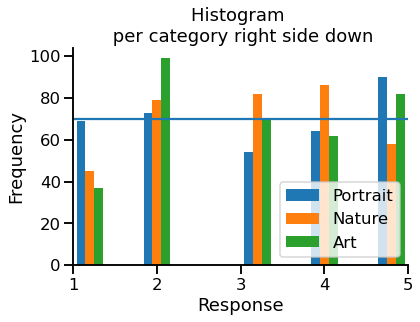

In [25]:
# distribution of quality values for each image orientation
plt.hist([por['response'],nat['response'],art['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title("Histogram \n per category right side down")
plt.legend(['Portrait', 'Nature', 'Art'], loc = 'lower right')
sns.despine()
plt.axhline(70)

#Wir haben 2100 / 2 = 1050 Datenpunkten die unterteilen wir in 3 categorien und diese Categorieren unterteilen
# in 5 Unterkategorien (Response) das heisst das am end wir mussen rein theoretisch falls jede proband
# die Bilder prefekt einstufte jeweils 2100/3/5 = 140 antworten pro bar haben.




In [26]:
por = usd[usd['category'] == 'portrait']
nat = usd[usd['category'] == 'nature']
art = usd[usd['category'] == 'art']

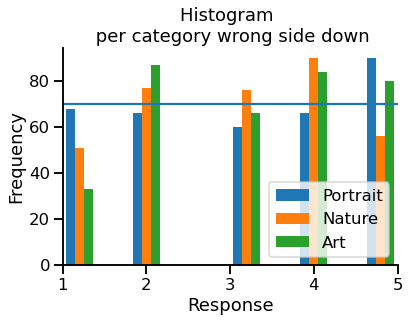

In [27]:
# distribution of quality values for each image orientation
plt.hist([por['response'],nat['response'],art['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title("Histogram \n per category wrong side down")
plt.legend(['Portrait', 'Nature', 'Art'], loc = 'lower right')
sns.despine()
plt.axhline(70)

#Wir haben 2100 / 2 = 1050 Datenpunkten die unterteilen wir in 3 categorien und diese Categorieren unterteilen
# in 5 Unterkategorien (Response) das heisst das am end wir mussen rein theoretisch falls jede proband
# die Bilder prefekt einstufte jeweils 2100/3/5 = 140 antworten pro bar haben.



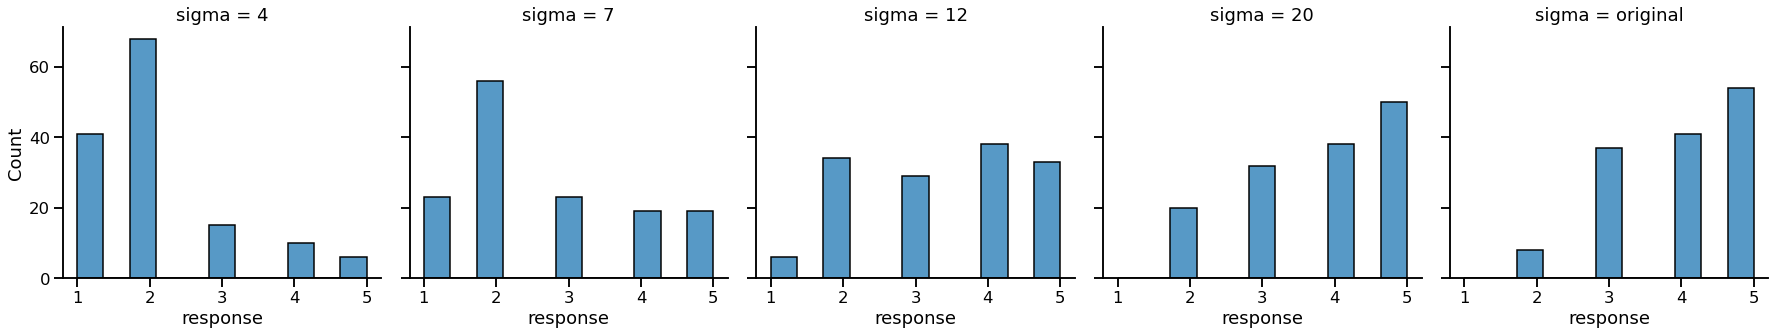

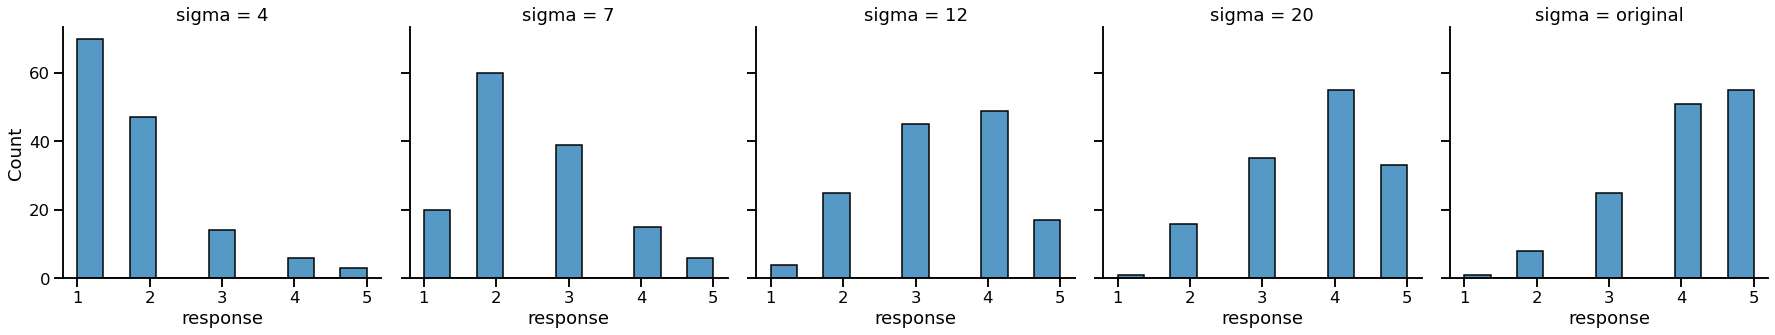

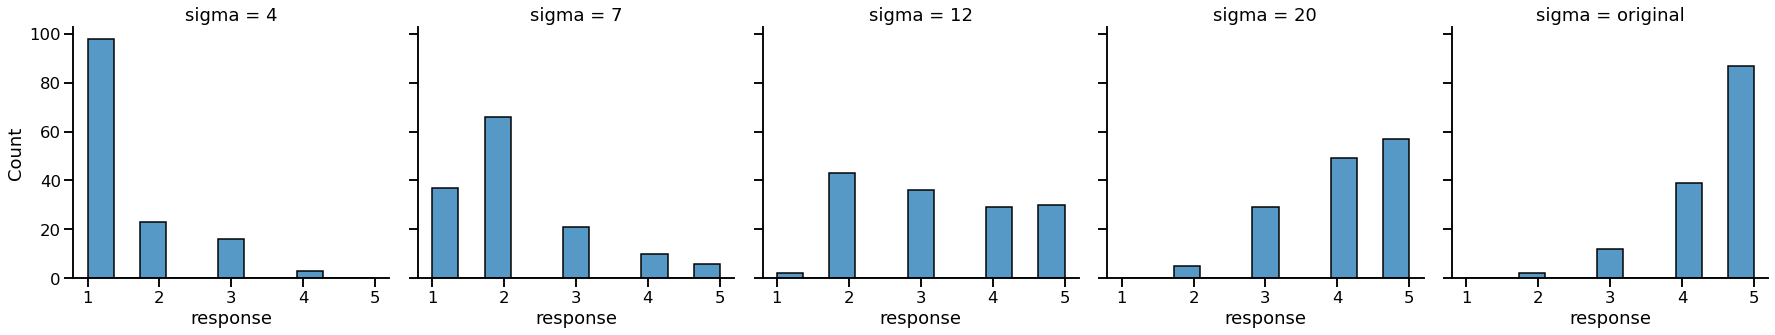

In [28]:
sns.displot(df[df["category"]=="art"], x="response", col="sigma",col_wrap=5, col_order=['4', '7', '12', '20', 'original'] )
sns.displot(df[df["category"]=="nature"], x="response", col="sigma",col_wrap=5, col_order=['4', '7', '12', '20', 'original'] )
sns.displot(df[df["category"]=="portrait"], x="response", col="sigma",col_wrap=5, col_order=['4', '7', '12', '20', 'original'] )
#portraits haben eine andere skala!!

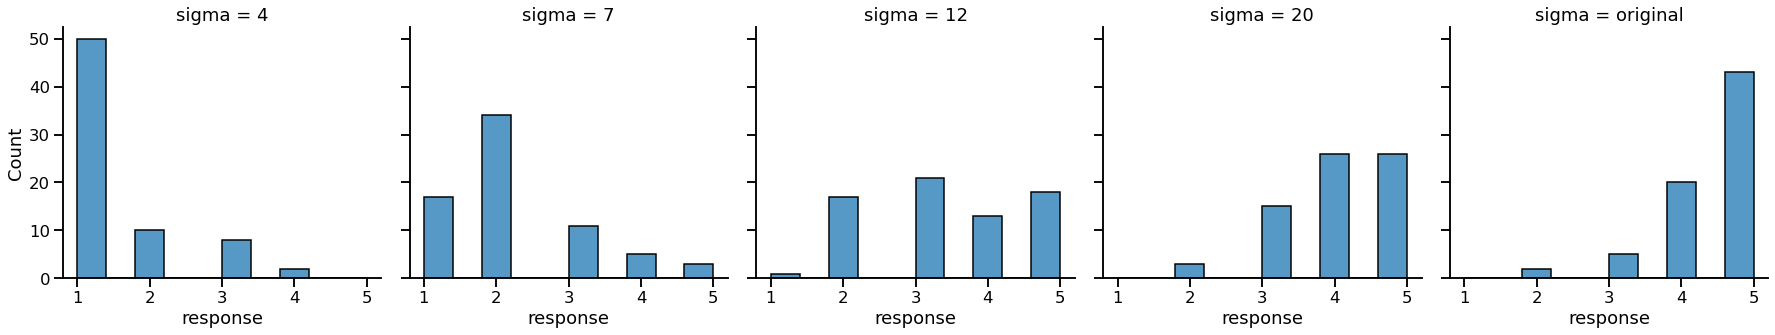

In [29]:
#Bewertungs verteilung bezuglich sigmas beim ungedrehten portraits
sns.displot(usd[usd["category"]=="portrait"], x="response", col="sigma",col_wrap=5,col_order=['4', '7', '12', '20', 'original'] )
#Bewertungs verteilung bezuglich sigmas beim gedrehten portraits



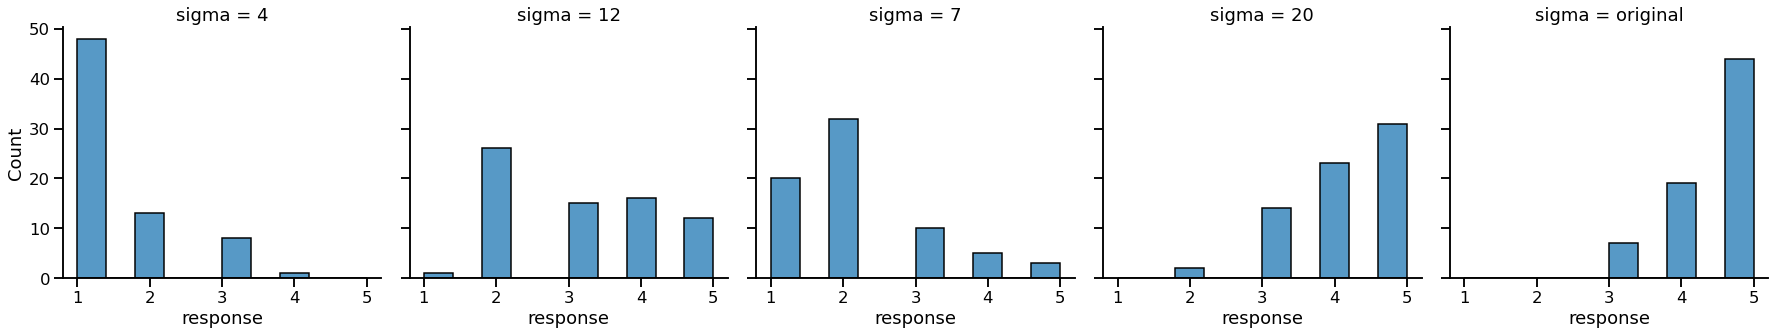

In [30]:
sns.displot(data = rsu[rsu["category"]=="portrait"], x="response", col="sigma", row_order=["4","7","12","20","original"] )


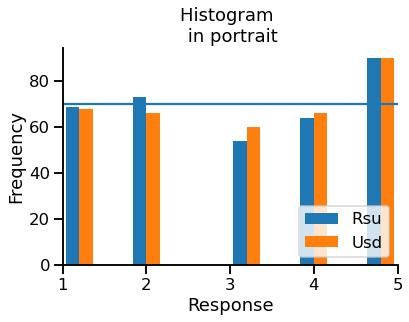

In [31]:
# distribution of quality values for each image orientation
rsupor = rsu[rsu["category"]=="portrait"]
udfpor = usd[usd["category"]=="portrait"]
plt.hist([rsupor['response'],udfpor['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title("Histogram \n in portrait")
plt.legend(['Rsu', 'Usd'], loc = 'lower right')
sns.despine()
plt.axhline(70)

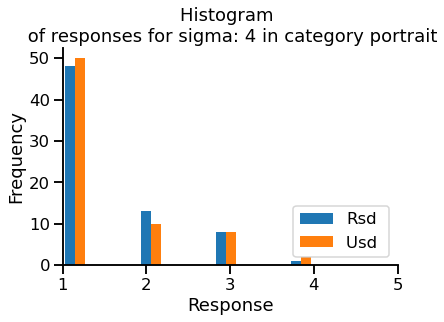

In [32]:
category = "portrait"
sig = "4"
rsupor = rsu[rsu["category"]==category]
usdpor = usd[usd["category"]==category]

plt.hist([rsupor[rsupor["sigma"]==sig]['response'],usdpor[usdpor["sigma"]==sig]['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title(f"Histogram \n of responses for sigma: {sig} in category {category}")
plt.legend(['Rsd', 'Usd '], loc = 'lower right')
sns.despine()

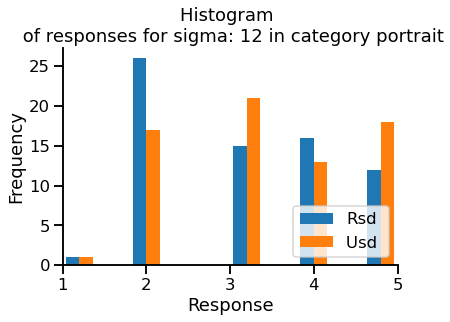

In [33]:
category = "portrait"
sig = "12"
rsupor = rsu[rsu["category"]==category]
usdpor = usd[usd["category"]==category]

plt.hist([rsupor[rsupor["sigma"]==sig]['response'],usdpor[usdpor["sigma"]==sig]['response']])
plt.xlabel('Response')
plt.ylabel('Frequency')

plt.xlim((1, 5))
plt.title(f"Histogram \n of responses for sigma: {sig} in category {category}")
plt.legend(['Rsd', 'Usd '], loc = 'lower right')
sns.despine()

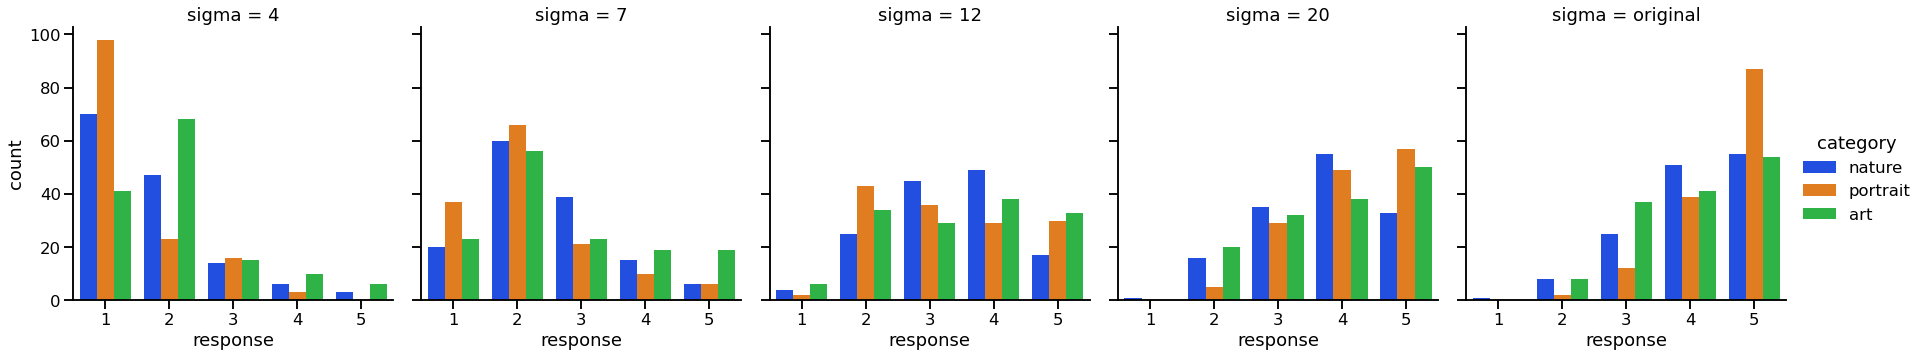

In [72]:

g = sns.catplot(x='response', data=df, hue='category',
                kind='count', ci='sd', 
                palette='bright',
               col='sigma',
                col_order=['4', '7', '12', '20', 'original'],
             
               )





portrait
art
nature


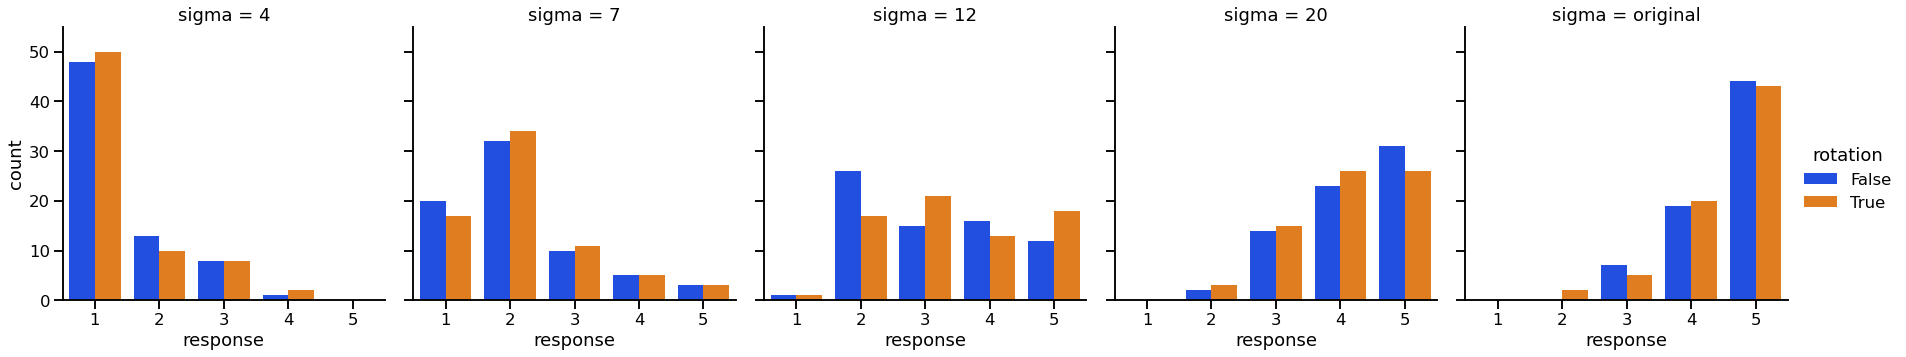

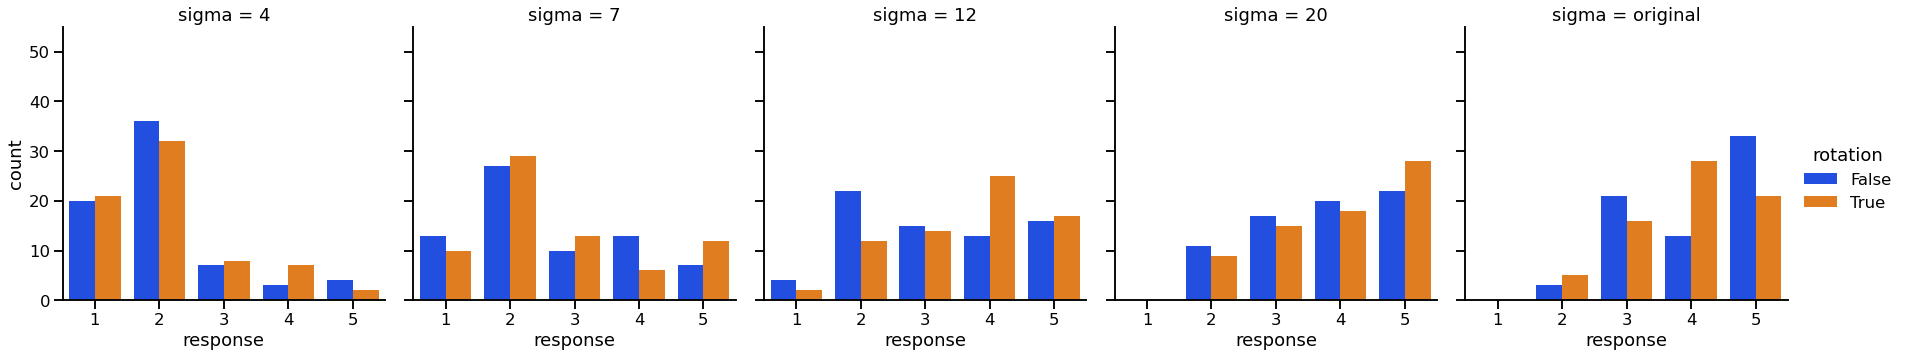

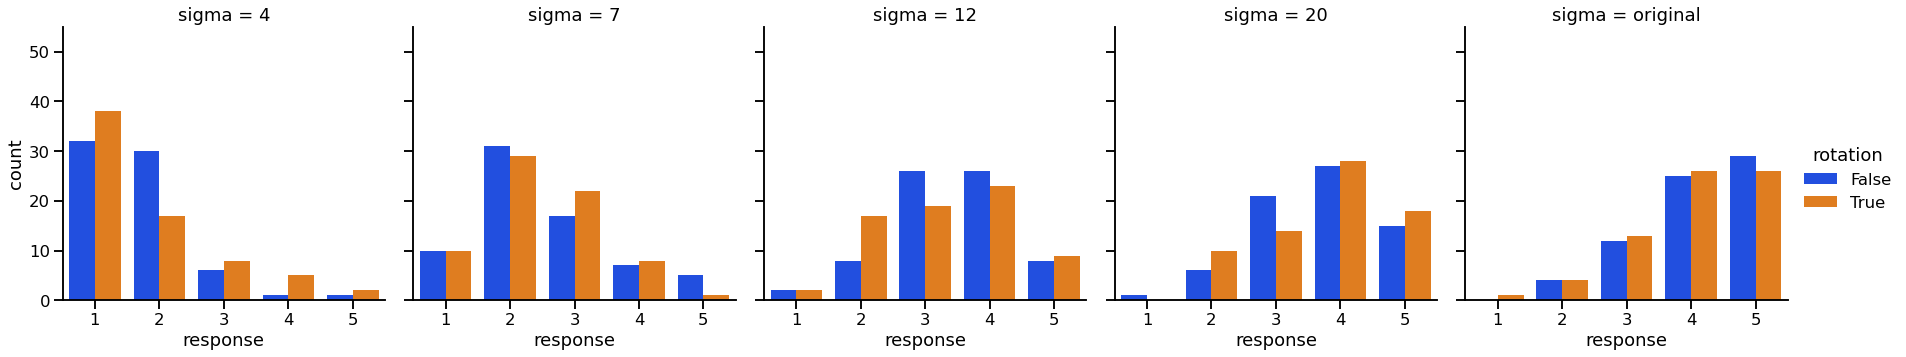

In [71]:

for cat in ["portrait","art","nature"]:
    print(cat)
    g = sns.catplot(x='response', data=df[df["category"]==cat], hue='rotation',
                kind='count', ci='sd', 
                palette='bright',
               col='sigma',
                col_order=['4', '7', '12', '20', 'original'],
             
               )
    g.set(ylim=(0, 55))




